In [1]:
import mne
import os
import os.path as op
import numpy as np
from scipy import stats
import pickle
from warnings import filterwarnings
from sys import argv
import matplotlib.pyplot as plt
from stormdb.access import Query
import src.group_stats as gs
import importlib
importlib.reload(gs)
filterwarnings("ignore", category=DeprecationWarning)

In [2]:
project = 'MINDLAB2020_MEG-AuditoryPatternRecognition'
project_dir = '/projects/' + project
os.environ['MINDLABPROJ']= project
os.environ['MNE_ROOT']= '~/miniconda3/envs/mne' # for surfer
os.environ['MESA_GL_VERSION_OVERRIDE'] = '3.2'

#avg_path = project_dir + '/scratch/working_memory/averages/data/'
stats_dir = project_dir + '/scratch/working_memory/results/stats/'
subs = np.arange(11,91) #[2,11,12,13,14,15,16]#np.arange(8) + 1
exclude = np.array([15,30,32,33,51,55,60,63,73,82]) # subjects with low maintenance accuracy
suffix = 'lf_0.05_hf_40_tstep_0.025_twin_0.05'

In [3]:
sdata, scodes, times = gs.load_ERF_sensor(subs, suffix, exclude)

loading subject 11
loading subject 12
loading subject 13
loading subject 14
loading subject 16
loading subject 17
loading subject 18
loading subject 19
loading subject 20
loading subject 21
loading subject 22
loading subject 23
could not load subject 0023_ZPC
[Errno 2] No such file or directory: '/projects/MINDLAB2020_MEG-AuditoryPatternRecognition/scratch/working_memory/averages/data/0023_ZPC/0023_ZPC_evoked_lf_0.05_hf_40_tstep_0.025_twin_0.05.p'
loading subject 24
loading subject 25
loading subject 26
loading subject 27
loading subject 28
loading subject 29
loading subject 31
loading subject 34
loading subject 35
loading subject 36
loading subject 37
loading subject 38
loading subject 39
loading subject 40
could not load subject 0040_LDN
[Errno 2] No such file or directory: '/projects/MINDLAB2020_MEG-AuditoryPatternRecognition/scratch/working_memory/averages/data/0040_LDN/0040_LDN_evoked_lf_0.05_hf_40_tstep_0.025_twin_0.05.p'
loading subject 41
loading subject 42
loading subject 43
l

In [4]:
grand_avg = {}
for e in sdata:
    grand_avg[e] = mne.grand_average(sdata[e])
    grand_avg[e].data = np.mean(np.array([cs.data for cs in sdata[e]]),0)
    grand_avg[e].comment = sdata[e][0].comment

Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...


In [5]:
conds = ['melody','melody_maintenance','melody_manipulation','block','interaction']
stats_results, times = {}, {}
ch_type = ['mag','grad']
for ct in ch_type:
    stats_results[ct], times[ct] = {}, {}
    adjacency,_ = mne.channels.find_ch_adjacency(sdata['interaction'][0].info,ch_type=ct)
    for c in conds:
        X = np.array([cs.copy().pick_types(ct).crop(tmin=0,tmax=4).data for cs in sdata[c]])
        times[ct][c] = sdata[c][0].copy().pick_types(ct).crop(tmin=0,tmax=4).times
        stats_results[ct][c] = gs.do_stats(X, method='montecarlo', adjacency=adjacency, FDR_alpha=.025, h0=0,
                                       cluster_alpha = .05, p_threshold = .05, n_permutations=500)

Reading adjacency matrix for neuromag306mag.
Clustering.
stat_fun(H1): min=-7.694263 max=6.619217
Running initial clustering
Using 39 thresholds from 0.00 to 7.60 for TFCE computation (h_power=2.00, e_power=0.50)
Found 16422 clusters
Permuting 499 times...


  0%|          |  : 0/499 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
Clustering.
stat_fun(H1): min=-7.356970 max=5.085910
Running initial clustering
Using 37 thresholds from 0.00 to 7.20 for TFCE computation (h_power=2.00, e_power=0.50)
Found 16422 clusters
Permuting 499 times...


  0%|          |  : 0/499 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
Clustering.
stat_fun(H1): min=-6.299015 max=6.596094
Running initial clustering
Using 33 thresholds from 0.00 to 6.40 for TFCE computation (h_power=2.00, e_power=0.50)
Found 16422 clusters
Permuting 499 times...


  0%|          |  : 0/499 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
Clustering.
stat_fun(H1): min=-4.871579 max=4.808310
Running initial clustering
Using 25 thresholds from 0.00 to 4.80 for TFCE computation (h_power=2.00, e_power=0.50)
Found 16422 clusters
Permuting 499 times...


  0%|          |  : 0/499 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
Clustering.
stat_fun(H1): min=-4.055320 max=3.596964
Running initial clustering
Using 21 thresholds from 0.00 to 4.00 for TFCE computation (h_power=2.00, e_power=0.50)
Found 16422 clusters
Permuting 499 times...


  0%|          |  : 0/499 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
Reading adjacency matrix for neuromag306planar.
Clustering.
stat_fun(H1): min=-10.343562 max=10.996288
Running initial clustering
Using 55 thresholds from 0.00 to 10.80 for TFCE computation (h_power=2.00, e_power=0.50)
Found 32844 clusters
Permuting 499 times...


  0%|          |  : 0/499 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
Clustering.
stat_fun(H1): min=-8.627578 max=7.355757
Running initial clustering
Using 44 thresholds from 0.00 to 8.60 for TFCE computation (h_power=2.00, e_power=0.50)
Found 32844 clusters
Permuting 499 times...


  0%|          |  : 0/499 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
Clustering.
stat_fun(H1): min=-7.967912 max=7.946700
Running initial clustering
Using 40 thresholds from 0.00 to 7.80 for TFCE computation (h_power=2.00, e_power=0.50)
Found 32844 clusters
Permuting 499 times...


  0%|          |  : 0/499 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
Clustering.
stat_fun(H1): min=-4.578778 max=5.602895
Running initial clustering
Using 29 thresholds from 0.00 to 5.60 for TFCE computation (h_power=2.00, e_power=0.50)
Found 32844 clusters
Permuting 499 times...


  0%|          |  : 0/499 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
Clustering.
stat_fun(H1): min=-4.193818 max=4.013625
Running initial clustering
Using 21 thresholds from 0.00 to 4.00 for TFCE computation (h_power=2.00, e_power=0.50)
Found 32844 clusters
Permuting 499 times...


  0%|          |  : 0/499 [00:00<?,       ?it/s]

Computing cluster p-values
Done.



############### mag ################

############# all ################

melody_maintenance


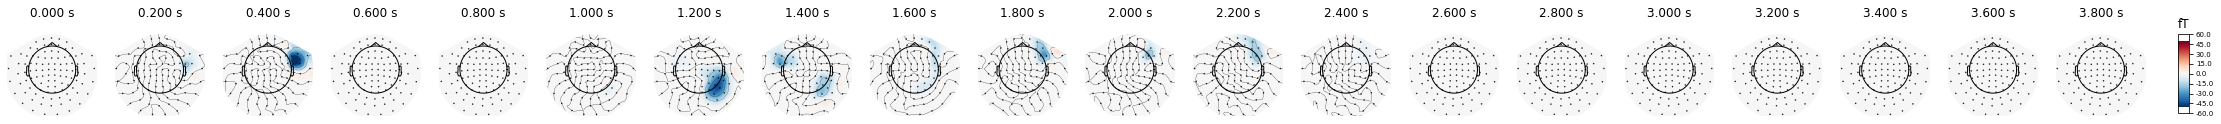

melody_manipulation


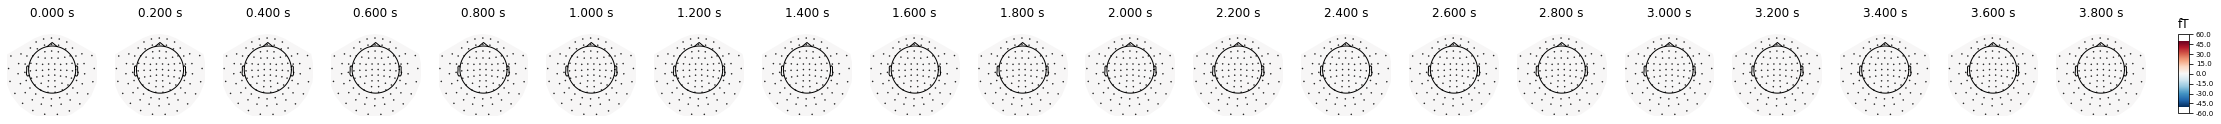

interaction


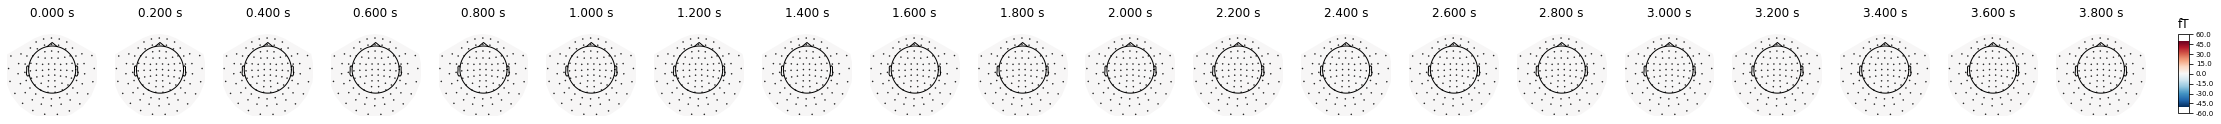


############### grad ################

############# all ################

melody_maintenance


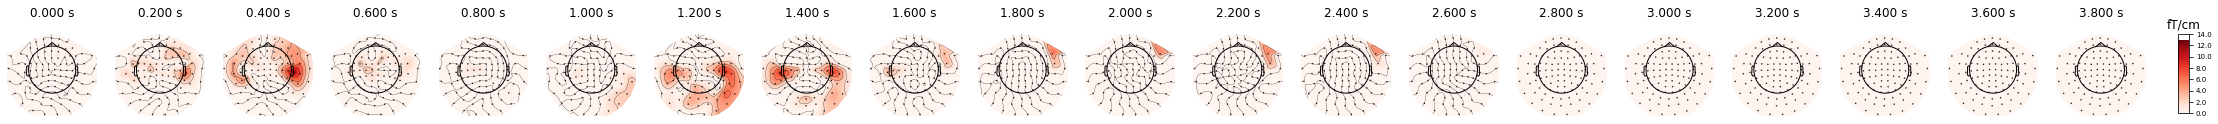

melody_manipulation


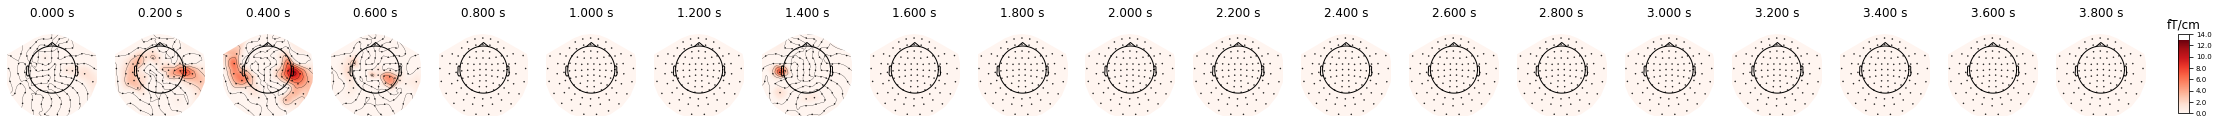

interaction


In [ ]:
#periods = {'encoding': [0,2], 'delay': [2,4]}#, 'retrieval': [4,6]}
periods = {'all': [0,4]}#, 'delay': [2,4]}#, 'retrieval': [4,6]}
# periods = {'encoding1': [0,.5],'encoding2': [.5,1],'encoding3': [1,1.5],'encoding4': [1.5,2], 
#            'delay1': [2,2.5],'delay2': [2.5,3],'delay3': [3,3.5],'delay4': [3.5,4]}#, 'retrieval': [4,6]}

ch_type = ['mag','grad']
vlims = {'mag': [-50,50],'grad': [0,13]}
conds = ['melody_maintenance','melody_manipulation','interaction']
for cht in ch_type:
    print('\n############### {} ################\n'.format(cht))
    for p in periods:
        print('############# {} ################\n'.format(p))
        for c in conds:
            tmin = periods[p][0]
            tmax = periods[p][1]
            cERF = grand_avg[c].copy()
            tidx = np.where([x and y for x,y in zip(times[cht][c] >= tmin, times[cht][c] <= tmax)])[0]
            cERF = cERF.pick_types(meg=cht).crop(tmin=tmin, tmax=tmax)

#             cdata = stats_results[cht][c]['tvals'].copy()
#             cdata = cdata[:,tidx]
            cdata =  cERF.data
            cmask = stats_results[cht][c]['mask'].copy()
            cmask = cmask[:,tidx]
            cERF.data = cdata*cmask
            plot_times = np.arange(tmin,tmax,0.2)
            print(c)
            cERF.plot_topomap(times=plot_times, average = .2, vmin = vlims[cht][0], vmax = vlims[cht][1])